In [1]:
from algorithms import (
    EpsilonGreedy,
    AlwaysMax,
    IfZeroBuy,
    Random,
    InventoryEnvironment,
)

## Epsilons comparison

In [2]:
models = [
    EpsilonGreedy(0.5, InventoryEnvironment),
    EpsilonGreedy(0.6, InventoryEnvironment),
    EpsilonGreedy(0.7, InventoryEnvironment),
    EpsilonGreedy(0.8, InventoryEnvironment),
    AlwaysMax(InventoryEnvironment),
    IfZeroBuy(InventoryEnvironment),
    Random(InventoryEnvironment),
]
learning_rewards_history = [[] for _ in range(len(models))]
explore_rewards_history = [[] for _ in range(len(models))]

In [3]:
for idx in range(len(models)):
    for day in range(1000):
        action = models[idx].choose()
        new_state, reward = models[idx].resolve(action)
        learning_rewards_history[idx].append(reward)
        models[idx].update(action, reward, new_state)

In [4]:
for idx in range(len(models)):
    for day in range(1000):
        action = models[idx].choose()
        new_state, reward = models[idx].resolve(action)
        explore_rewards_history[idx].append(reward)
        models[idx].state = new_state

### Visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Learning curve

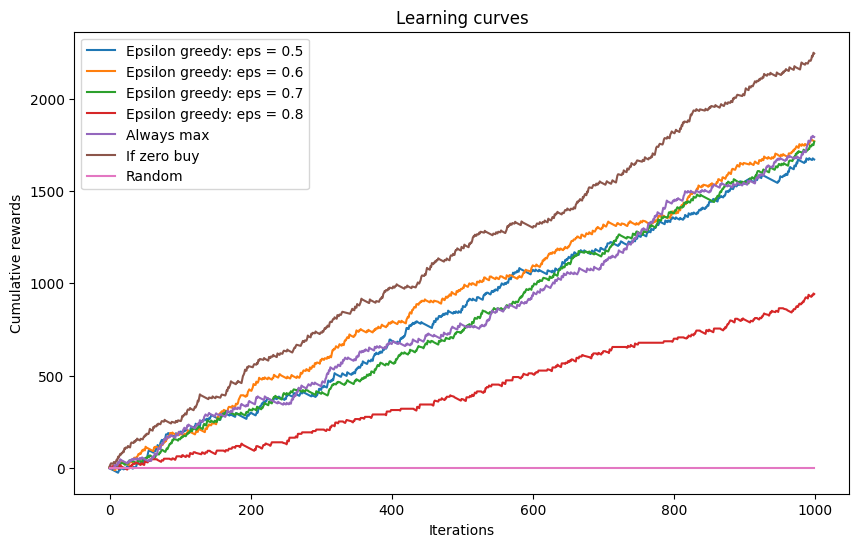

In [6]:
plt.figure(figsize=(10, 6))

for idx, model in enumerate(models):
    plt.plot(np.cumsum(learning_rewards_history[idx]), label=str(model))

plt.xlabel("Iterations")
plt.ylabel("Cumulative rewards")
plt.legend()
plt.title("Learning curves")
plt.show()

#### Explore curve

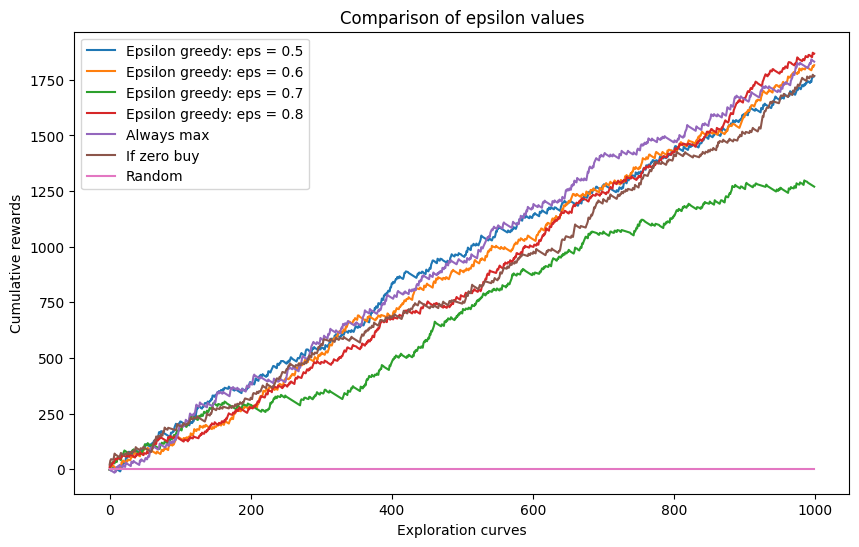

In [7]:
plt.figure(figsize=(10, 6))

for idx, model in enumerate(models):
    plt.plot(np.cumsum(explore_rewards_history[idx]), label=str(model))

plt.xlabel("Exploration curves")
plt.ylabel("Cumulative rewards")
plt.legend()
plt.title("Comparison of epsilon values")
plt.show()